In [1]:
%matplotlib inline

from __future__ import division

import sys
import tensorflow as tf
import skimage.io as io
import numpy as np

sys.path.append("/home/tingwei/All/Machine_Learning/Image_Segmentation/Daniil_tf-image-segmentation/")
sys.path.append("/home/tingwei/All/Machine_Learning/Image_Segmentation/models/slim")

fcn_16s_checkpoint_path = '/home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt'


slim = tf.contrib.slim

from tf_image_segmentation.models.fcn_8s import FCN_8s
from tf_image_segmentation.utils.inference import adapt_network_for_any_size_input
from tf_image_segmentation.utils.pascal_voc import pascal_segmentation_lut


In [2]:
number_of_classes = 21

image_filename = 'data/imgs/me.jpg'

#image_filename = 'small_cat.jpg'

image_filename_placeholder = tf.placeholder(tf.string)

feed_dict_to_use = {image_filename_placeholder: image_filename}

image_tensor = tf.read_file(image_filename_placeholder)

image_tensor = tf.image.decode_jpeg(image_tensor, channels=3)

# Fake batch for image and annotation by adding
# leading empty axis.
image_batch_tensor = tf.expand_dims(image_tensor, axis=0)

# Be careful: after adaptation, network returns final labels
# and not logits
FCN_8s = adapt_network_for_any_size_input(FCN_8s, 32)


pred, fcn_16s_variables_mapping = FCN_8s(image_batch_tensor=image_batch_tensor,
                                          number_of_classes=number_of_classes,
                                          is_training=False)

# The op for initializing the variables.
initializer = tf.local_variables_initializer()

saver = tf.train.Saver()

INFO:tensorflow:Restoring parameters from /home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt


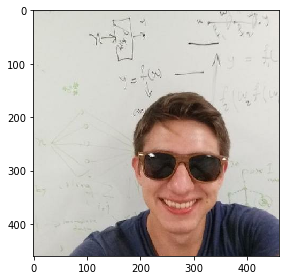

/home/tingwei/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


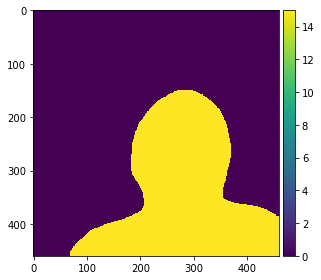

In [3]:
with tf.Session() as sess:
    
    sess.run(initializer)

    saver.restore(sess, "/home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt")
    
    image_np, pred_np = sess.run([image_tensor, pred], feed_dict=feed_dict_to_use)
    
    io.imshow(image_np)
    io.show()
    
    io.imshow(pred_np.squeeze())
    io.show()

In [4]:
pascal_segmentation_lut()

{0: 'background',
 1: 'aeroplane',
 2: 'bicycle',
 3: 'bird',
 4: 'boat',
 5: 'bottle',
 6: 'bus',
 7: 'car',
 8: 'cat',
 9: 'chair',
 10: 'cow',
 11: 'diningtable',
 12: 'dog',
 13: 'horse',
 14: 'motorbike',
 15: 'person',
 16: 'potted-plant',
 17: 'sheep',
 18: 'sofa',
 19: 'train',
 20: 'tv/monitor',
 255: 'ambigious'}